<a href="https://colab.research.google.com/github/sallumandya1995/datascience/blob/master/baith_al_hasan_final_submission_assemblyai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Baith ul Ahsan(the best house) 🏡 powered by Cohere and stable diffusion**
 
Baith ul Ahsan(the best house) 🏡 is a web app that uses the power of artificial intelligence to create Aesthetic exteriors and interiors . With the Cohere language Command model, it can generate descriptions of exterior or interior of your home, and the Stable Diffusion algorithm creates relevant appealing images to bring your vision to your thoughts. Give Baith al ahsan a try and see how it can elevate your interior design.–if you want to scale / reaserch / build mobile app on this space konnect me @here

In [ ]:
huggingface spaces https://huggingface.co/spaces/Xhaheen/Baith-ul-ahasn_assembly_hackathon

In [ ]:
 
!pip install stability_sdk gradio cohere
!pip install --upgrade diffusers transformers scipy
import os
import cohere
import random
# co = cohere.Client(cohere_key)

import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
from PIL import Image
import re
import matplotlib.pyplot as plt
 

os.environ['STABILITY_HOST'] = 'grpc. .ai:443' # enter value   from dreamstudio http://dreamstudio.ai/ 
os.environ['STABILITY_KEY'] = 'sk- ' # enter api key from dreamstudio http://dreamstudio.ai/ 

STABILITY_HOST = os.environ["STABILITY_HOST"]
STABILITY_KEY = os.environ["STABILITY_KEY"]
co = cohere.Client(' ')# #enter api key of cohere
# cohere_key = os.environ["cohere_key"]
# co = cohere.Client(cohere_key)
 


def generate_caption_keywords(promptz, model='command-xlarge-20221108', max_tokens=200, temperature=random.uniform(0.1, 2), k=0, p=0.75, frequency_penalty=0, presence_penalty=0, stop_sequences=[]):
 
    response = co.generate(
      model='command-xlarge-20221108',
      prompt=f'write prompts for interior designs which does not exist\n\nexterior design of house = Peaceful wooden mansion, unreal engine 5 tech demo, zillow interior, living room, cozy, Frank Lloyd Wright\n##\nexterior design of house = Double story suburban house,it is raining, night time , peaceful atmosphere, moody lighting , digital art , highly detailed , high contrast, beautiful lighting, award winning , trending on art station, photorealistic, 8k \n##\nexterior design of house =cute chubby house, 3 d render, minimalistic, octane, 1 0 0 mm, depth of field, diorama, blue background \n##\nexterior design of house =elevation of a modern luxurious villa in a rich urban area, photorealist, 4 k \n##\ninterior design  of  of kitchen room = Full modern kitchen, purple furniture, star wallpaper, digital Painting, ultradetailed, artstation, oil Painting, ultradetailed, artstation\n##\ninterior design of  of bathroom =bathroom design archi-viz biopunck grean schem, by Stanley Artgerm Lau, WLOP, Rossdraws, James Jean, Andrei Riabovitchevy, Marc Simonetti, and Sakimichan, trending on artstation\n##\ninterior design  of    bathroom = modern bathroom, gloomy and foggy atmosphere, octane render, artstation trending, horror scene, highly detailed \n##\n{promptz} =',
      max_tokens=25,
      temperature=0.6,
      k=0,
      p=1,
      frequency_penalty=0,
      presence_penalty=0,
      stop_sequences=["##"],
      return_likelihoods='NONE')
# print('Prediction: {}'.format(response.generations[0].text))
    def highlight_keywords(text):
        keywords = []
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text) # remove punctuation
        text = re.sub(r'\b(the|and|of)\b', '', text) # remove stop words
        words = text.split()
        for word in words:
            if word not in keywords:
                keywords.append(word)
        return keywords

    caption = response.generations[0].text
    keywords = highlight_keywords(caption)
    keywords_string = ', '.join(keywords)

    return caption, keywords_string


 
def img2img(  design,is_prompt,is_GPU,custom_prompt,cfg_scale,steps):
  try:
    caption, keywords = generate_caption_keywords(design)
    prompt = design+keywords
  except:
    prompt = design

  if is_prompt == True:
    prompt = custom_prompt


  if is_GPU == True:


    
    import torch
    from diffusers import StableDiffusionPipeline
    !python -c "from huggingface_hub.hf_api import HfFolder; HfFolder.save_token(' ')"

    model_id = "CompVis/stable-diffusion-v1-4"
    device = "cuda"


    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16")
    pipe = pipe.to(device)

    # prompt = "a photo of an astronaut riding a horse on mars"
    img = pipe(prompt).images[0]  
    import matplotlib.pyplot as plt
    # img.save(f"{prompt}image")

  else:



    engine="stable-diffusion-v1-5"
    # Set up our connection to the API.
    stability_api = client.StabilityInference(
        key=os.environ['STABILITY_KEY'], # API Key reference.
        verbose=True, # Print debug messages.
        engine=engine, # Set the engine to use for generation. 
        # Available engines: stable-diffusion-v1 stable-diffusion-v1-5 stable-diffusion-512-v2-0  stable-inpainting-v1-0 stable-inpainting-512-v2-0
    )

    # Set up our initial generation parameters.
    answers = stability_api.generate(
        prompt=prompt,
        seed=random.seed(), # If a seed is provided, the resulting generated image will be deterministic.
                        # What this means is that as long as all generation parameters remain the same, you can always recall the same image simply by generating it again.
                        # Note: This isn't quite the case for Clip Guided generations, which we'll tackle in a future example notebook.
        steps=steps, # Amount of inference steps performed on image generation. Defaults to 30. 
        cfg_scale=cfg_scale, # Influences how strongly your generation is guided to match your prompt.
                      # Setting this value higher increases the strength in which it tries to match your prompt.
                      # Defaults to 7.0 if not specified.
        width=512, # Generation width, defaults to 512 if not included.
        height=512, # Generation height, defaults to 512 if not included.
        samples=1, # Number of images to generate, defaults to 1 if not included.
        sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                    # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                    # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m)
    )

    # Set up our warning to print to the console if the adult content classifier is tripped.
    # If adult content classifier is not tripped, save generated images.
    for resp in answers:
        for artifact in resp.artifacts:
            if artifact.finish_reason == generation.FILTER:
                warnings.warn(
                    "Your request activated the API's safety filters and could not be processed."
                    "Please modify the prompt and try again.")
            if artifact.type == generation.ARTIFACT_IMAGE:
                img = Image.open(io.BytesIO(artifact.binary))
    
                # display(img)
                img.save(f"new_image{prompt}{cfg_scale}{steps}{random.seed()}.jpg")
                print(prompt)
  return img ,prompt+'steps'+str(steps)+'strength'+str(cfg_scale)+str(random.seed())
  
# img2img( "exterior design of home",True,True,"exterior design of home",7,50)




In [5]:

import gradio as gr  
gr.Interface(img2img,  [
                      #  gr.Image(source="upload", type="filepath", label="Input Image"),
    
                        gr.Dropdown(['exterior design of home',
                                     'interior design of living room', 
 
                                         'interior design of kitchen',
 
                                         'interior design of bathroom'
                                          ],label="Click here to select your design by Cohere command Langauge model",value = 'interior design'),
                                            
                                            gr.Checkbox(label="Check Custom design if you already have prompt refer  https://lexica.art/?q=interior+design for inpiration",value = False),
                                            gr.Checkbox(label="click to use GPU ",value = False),

                        gr.Textbox(label = ' Input custom Prompt Text'), 
                         
                        gr.Slider(2, 15, value = 7, label = 'Guidence Scale'),
                        gr.Slider(10, 50, value = 50, step = 1, label = 'Number of steps / Iterations')
                        ], 
                        [gr.Image(),gr.Textbox(label="Prompt for future reference",lines=2 )], 

             title = "" +'Baith ul Ahsan🏡(the best house),Create Aesthetic exteriors and interiors of house with power of COhere Language model and Stable Diffusion '+ "",
                                    description="Baith ul Ahsan(the best house) 🏡  is a web app that uses the power of artificial intelligence to create Aesthetic exteriors and interiors . With the Cohere language Command model, it can generate descriptions of exterior or interior of your home, and the Stable Diffusion algorithm creates relevant appealing images to bring your vision to your thoughts. Give Baith al ahsan a try and see how it can elevate your interior design.--if you want to scale / reaserch / build mobile app on this space konnect me   @[here](https://www.linkedin.com/in/sallu-mandya/)").launch(  share=True,debug = True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().


INFO:stability_sdk.client:Got keepalive 6920dca3-02de-4f49-871b-0155a8446e4d in 3.09s
INFO:stability_sdk.client:Got 6920dca3-02de-4f49-871b-0155a8446e4d with ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.11s


interior designa, bedroom, modern, simple, clean, with, touch, color, artstation, trending, life
Running on public URL: https://6bbe45e067edb004.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443
INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got keepalive 869d66fb-8cf1-440b-82ad-464a6c5695f3 in 0.82s


Keyboard interruption in main thread... closing server.


INFO:stability_sdk.client:Got keepalive 869d66fb-8cf1-440b-82ad-464a6c5695f3 in 3.36s
INFO:stability_sdk.client:Got 869d66fb-8cf1-440b-82ad-464a6c5695f3 with ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.14s


exterior design of homepeaceful, wooden, mansion, unreal, engine, tech, demo, zillow, interior, living, room, cozy, frank, lloyd


# access hugginface spaces link from https://huggingface.co/spaces/Xhaheen/Baith-ul-ahasn_assembly_hackathon

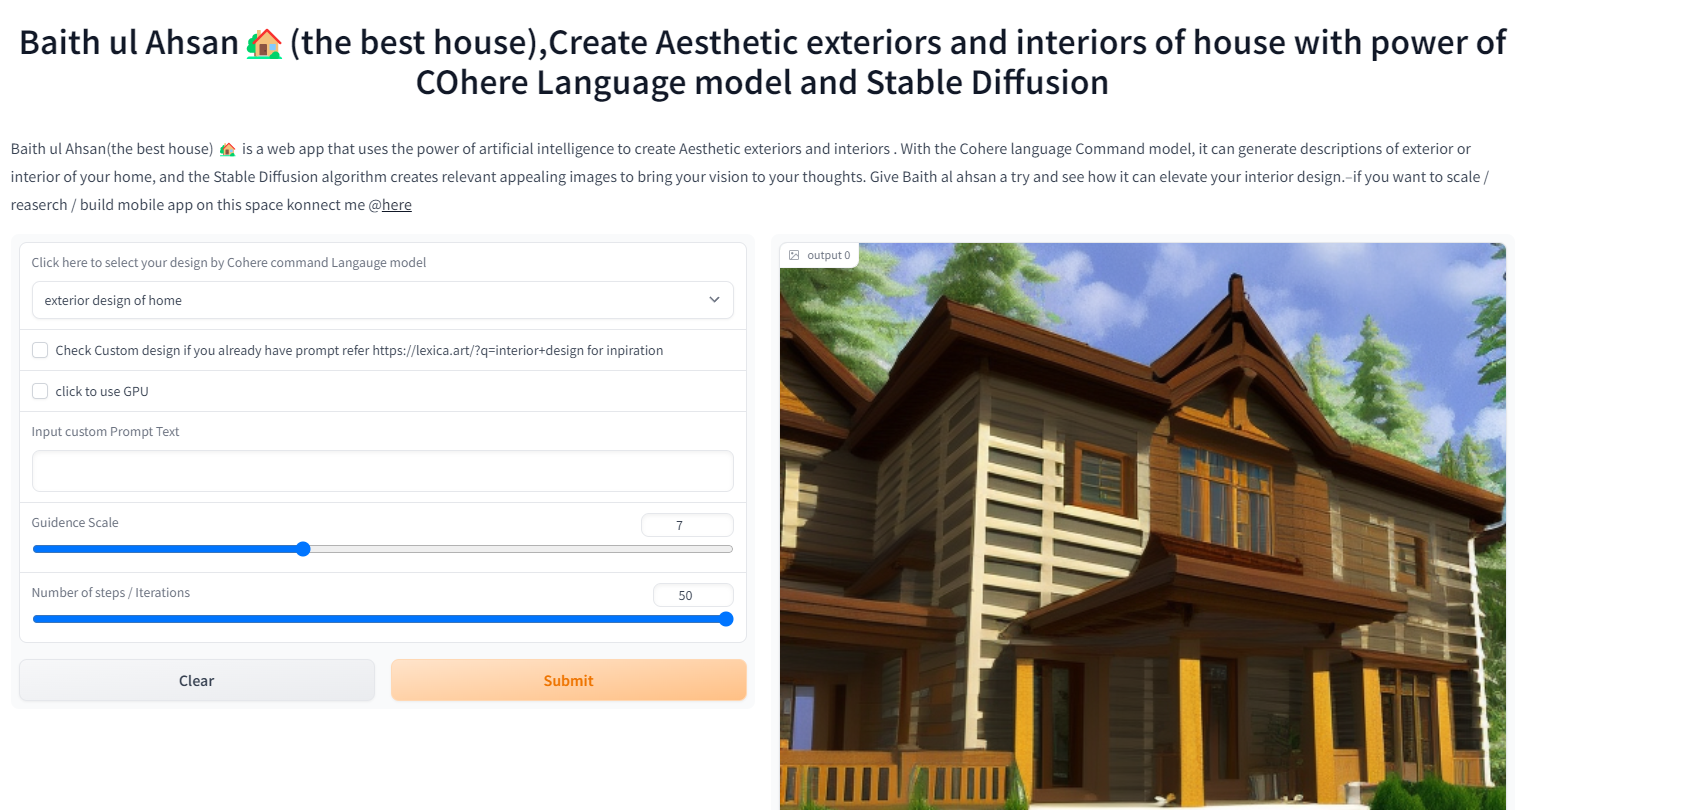